## NGC-188 İsochrone 9.60 - 9.71 - 0.03 
Eşyaş çizgisi PADOVA 9.60'dan 9.71'e 0.03 adım araliği ile veri oluşturulup bu verinin küme verisi üzerinde çakıştırılması.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# verilerin dahil edilmesi
filengc = pd.read_csv("NGC188.csv") # king verisini pandas ile oku
filezams = pd.read_csv("SUNG_ZAMS.csv") # zams verisini pandas ile oku
data_ngc = pd.DataFrame(filengc) # verileri dataframe donustur
data_zams = pd.DataFrame(filezams)
data_ngc.head()

,No,Ref,V,BV,UB
0,1,240,13.029,1.035,0.682
1,2,240,14.930,0.783,0.305
2,14,240,10.761,0.618,0.113
3,16,240,13.002,0.472,-0.033
4,101,240,16.861,0.892,NaN


In [3]:
# pandas verilerinin numpy verilerine donusturulmesi
B_V0 = np.array(data_zams["B-V"]) # pandas verisini numpy array cevirme
U_B0 = np.array(data_zams["U-B"]) # pandas verisini numpy arary cevirme
V = np.array(data_ngc["V"])
V0 = np.array(data_zams["Mv"])

# ngc pandas verilerini numpy verisine donustur
B_V = np.array(data_ngc["BV"]) # pandas verisini numpy array cevirme
U_B = np.array(data_ngc["UB"]) # pandas verisini numpy arary cevirme

# zams pandas verilerini numpy verisine donustur
zB_V = np.array(data_zams["B-V"])
zU_B = np.array(data_zams["U-B"])

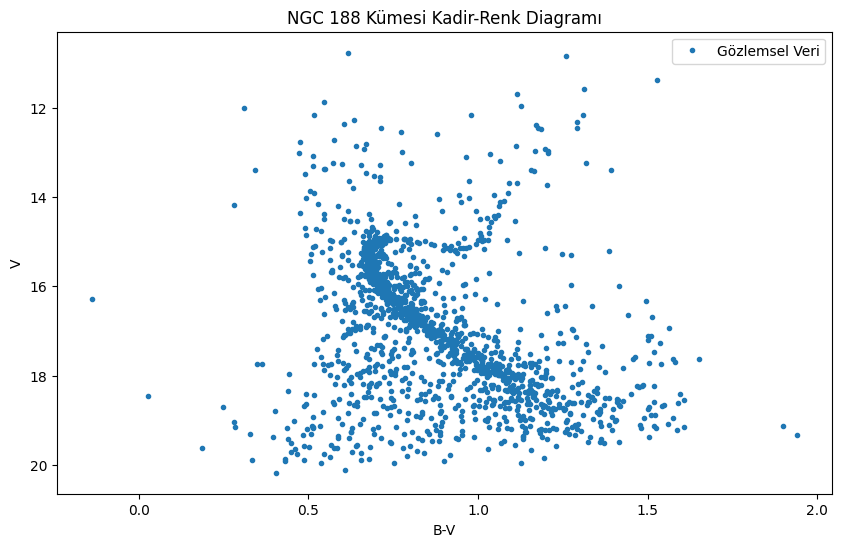

In [4]:
# verileri gorsellestirelim
plt.figure(figsize=(10,6))
plt.plot(B_V,V,".",label="Gözlemsel Veri")
plt.title("NGC 188 Kümesi Kadir-Renk Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis() # y eksenini ters çevirdik
plt.legend()
#plt.savefig("ngc-dersteki.svg",format="svg")
#plt.grid()
plt.show()

In [5]:
iso_data = pd.read_csv("ngc-188-003-adim.csv",dtype=np.float64)
iso_data.dropna(how="all")

,logAge,Umag,Bmag,Vmag,Unnamed: 4,Unnamed: 5,Unnamed: 6,logAge.1,Umag.1,Bmag.1,...,Umag.2,Bmag.2,Vmag.2,Unnamed: 18,Unnamed: 19,Unnamed: 20,logAge.3,Umag.3,Bmag.3,Vmag.3
0,9.6,22.607,19.983,18.146,NaN,NaN,NaN,9.63,22.607,19.983,...,22.606,19.983,18.146,NaN,NaN,NaN,9.69,22.606,19.983,18.145
1,9.6,22.087,19.500,17.672,NaN,NaN,NaN,9.63,22.358,19.752,...,22.087,19.499,17.672,NaN,NaN,NaN,9.69,22.087,19.499,17.671
2,9.6,21.030,18.588,16.793,NaN,NaN,NaN,9.63,22.087,19.500,...,21.027,18.586,16.791,NaN,NaN,NaN,9.69,21.026,18.585,16.790
3,9.6,20.989,18.557,16.764,NaN,NaN,NaN,9.63,21.801,19.232,...,19.477,17.367,15.660,NaN,NaN,NaN,9.69,20.926,18.509,16.719
4,9.6,19.479,17.369,15.662,NaN,NaN,NaN,9.63,21.029,18.587,...,18.472,16.549,14.890,NaN,NaN,NaN,9.69,19.476,17.366,15.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,9.6,3.363,3.640,2.348,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,9.6,3.657,3.882,2.553,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,9.6,3.974,4.116,2.737,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,9.6,5.059,4.829,3.241,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
iso_data["Umag.1"].dropna()

0      22.607
1      22.358
2      22.087
3      21.801
4      21.029
        ...  
324     3.213
325     3.349
326     3.505
327     3.618
328    29.720
Name: Umag.1, Length: 329, dtype: float64

In [7]:
# isochrone(es yas cizgisi) = 9.6 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag96 = np.array(iso_data.Vmag.dropna()) # V
B_V096 = np.array(iso_data.Bmag.dropna()-iso_data.Vmag.dropna()) # B-V

# isochrone(es yas cizgisi) = 9.65 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag963 = np.array(iso_data["Vmag.2"].dropna())
B_V0963 = np.array(iso_data["Bmag.1"].dropna()-iso_data["Vmag.1"].dropna())

# isochrone(es yas cizgisi) = 9.7 icin degerlerin 
# numpy arraylerine cevrilmesi
Vmag969 = np.array(iso_data["Vmag.2"].dropna())
B_V0969 = np.array(iso_data["Bmag.2"].dropna()-iso_data["Vmag.2"].dropna())

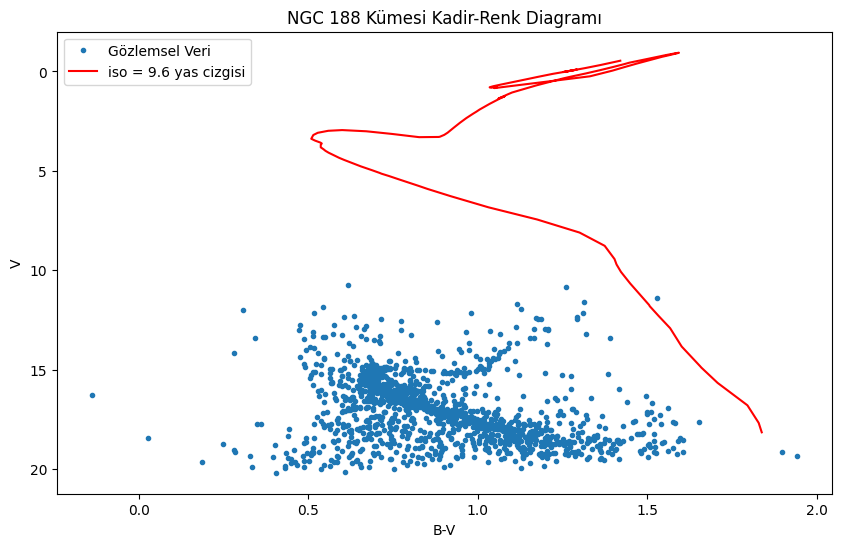

In [8]:
# verileri gorsellestirelim
plt.figure(figsize=(10, 6))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V096[:200], Vmag96[:200], "r-", label="iso = 9.6 yas cizgisi")
# plt.plot(B_V965,V965,"b-",label="iso = 9.65 yas cizgisi")
# plt.plot(B_V97,V97,"m-",label="iso = 9.7 yas cizgisi")
plt.title("NGC 188 Kümesi Kadir-Renk Diagramı")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
# plt.savefig("ngc-dersteki.svg",format="svg")
# plt.grid()
plt.show()

In [9]:
# verilerin kızartılmasi ve yas cizgisinin oturtulmasi

EB_V = 0.082 # ngc-188 reddening(kizarma) = 0.082 
EB_V1 = 0.09 # makale sonuc kızarma degeri
DM = 11.81 # ngc-188 uzaklik modulu [mag] = 11.81
DM1 = 11.44 # makaledeki sonuc uzaklik degeri

# V = Vmag + (3.1 * E(B-V)) + DM
V96 = Vmag96 + (3.1*EB_V1) + DM1
V963 = Vmag963 + (3.1*EB_V1) + DM1
V969 = Vmag969 + (3.1*EB_V1) + DM1

# B-V = (B-V)0 + E(B-V)
B_V96 = B_V096 + EB_V1
B_V963 = B_V0963 + EB_V1
B_V969 = B_V0969 + EB_V1

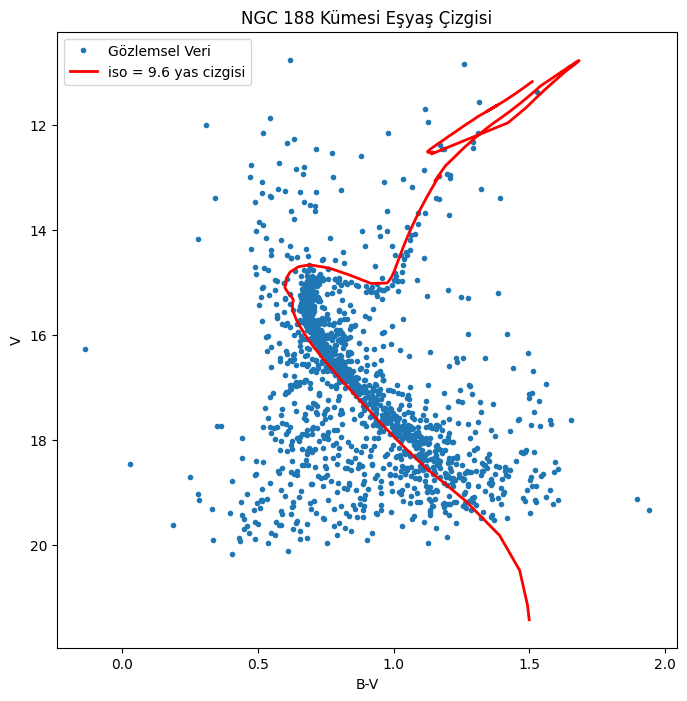

In [10]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V96[15:200], V96[15:200], "r-",linewidth=2, label="iso = 9.6 yas cizgisi")
#plt.plot(B_V96[15:200], V96[15:200], "ro",linewidth=3, label="iso = 9.6 yas cizgisi")
plt.title("NGC 188 Kümesi Eşyaş Çizgisi")
plt.xlabel("B-V")
plt.ylabel("V")
plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
# plt.savefig("ngc-dersteki.svg",format="svg")
# plt.grid()
plt.show()

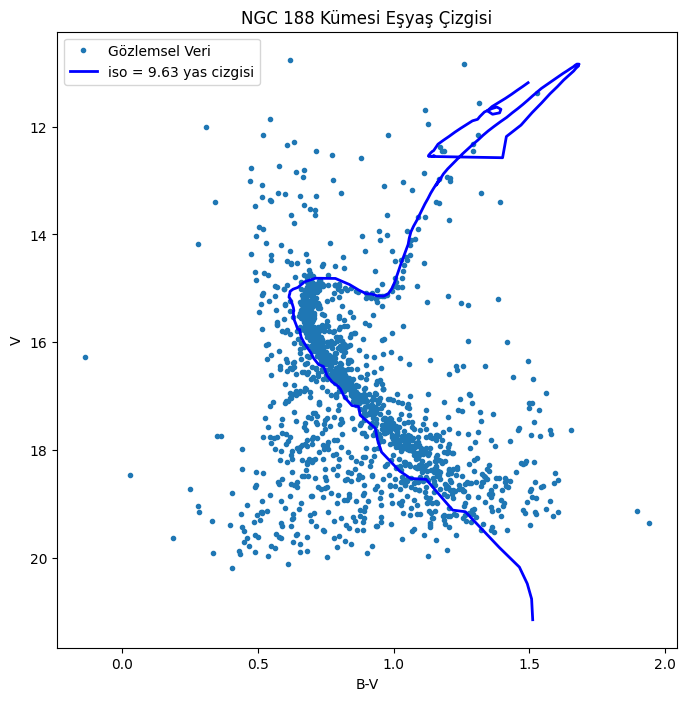

In [11]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V963[15:200],V963[15:200],"b-",linewidth=2, label="iso = 9.63 yas cizgisi")
plt.title("NGC 188 Kümesi Eşyaş Çizgisi")
plt.xlabel("B-V")
plt.ylabel("V")
plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.savefig("iso-9.63.svg",format="svg")
# plt.grid()
plt.show()

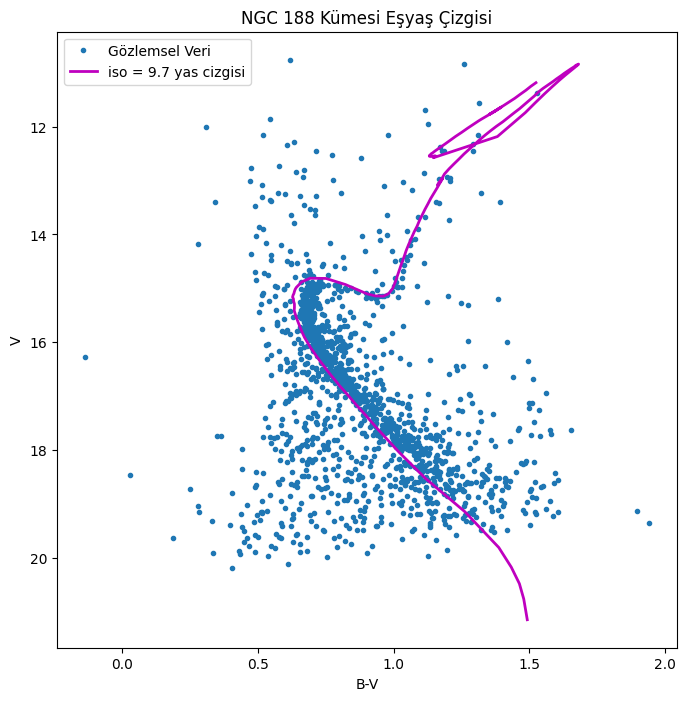

In [12]:
# verileri gorsellestirelim
plt.figure(figsize=(8,8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V969[15:200],V969[15:200],"m-",linewidth=2, label="iso = 9.7 yas cizgisi")

plt.title("NGC 188 Kümesi Eşyaş Çizgisi")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
# plt.savefig("ngc-dersteki.svg",format="svg")
# plt.grid()
plt.show()

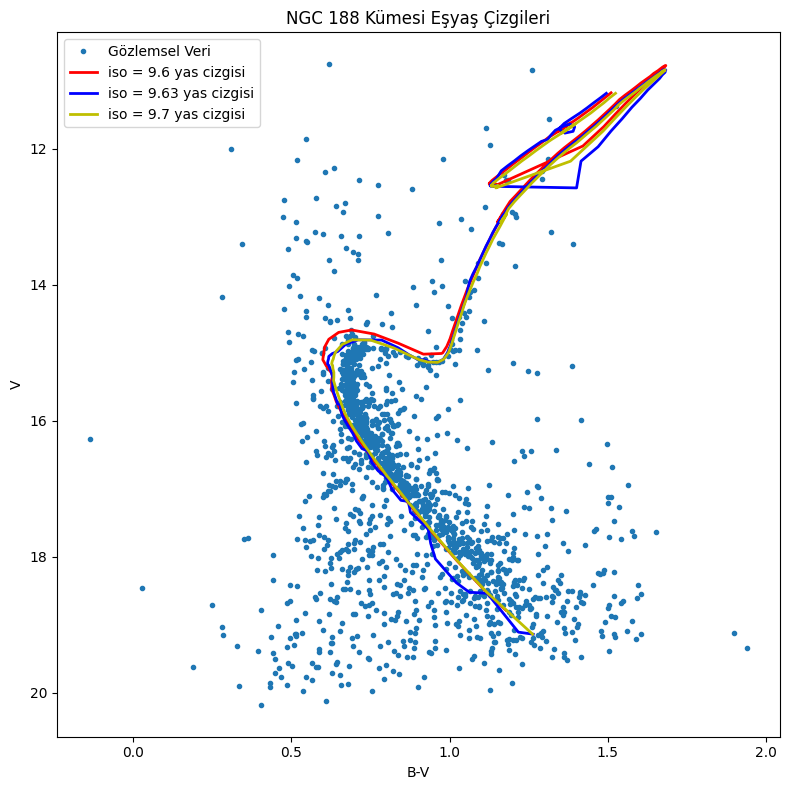

In [15]:
# verileri gorsellestirelim
plt.figure(figsize=(8, 8))
plt.plot(B_V, V, ".", label="Gözlemsel Veri")
plt.plot(B_V96[20:200], V96[20:200], "r-",linewidth=2, label="iso = 9.6 yas cizgisi")
plt.plot(B_V963[20:200],V963[20:200],"b-",linewidth=2, label="iso = 9.63 yas cizgisi")
plt.plot(B_V969[20:200],V969[20:200],"y-",linewidth=2, label="iso = 9.7 yas cizgisi")
plt.title("NGC 188 Kümesi Eşyaş Çizgileri")
plt.xlabel("B-V")
plt.ylabel("V")

plt.gca().invert_yaxis()  # y eksenini ters çevirdik
plt.legend()
plt.tight_layout()
plt.savefig("isos-2.svg",format="svg")
# plt.grid()
plt.show()